* 教材插图: https://www.astroml.org/book_figures/chapter1/
* CasJobs: http://casjobs.sdss.org/CasJobs/
* 列名说明: http://skyserver.sdss3.org/dr8/en/help/browser/browser.asp
* SDSS星等类型说明: http://www.sdss.org/dr7/algorithms/index.html
* flag说明: http://www.sdss.org/dr7/products/catalogs/flags.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


---
# 本书使用的数据

## Figure 1.1 SDSS imaging catalog

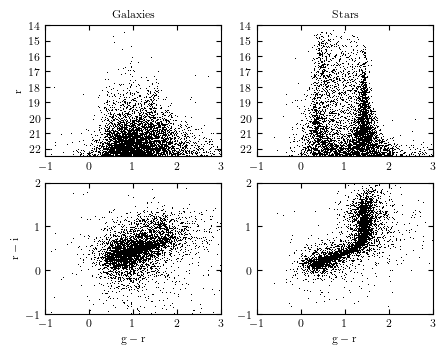

In [2]:
from astroML.datasets import fetch_imaging_sample


def get_stars_and_galaxies(Nstars=5000, Ngals=5000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample()

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    galaxies = data[objtype == 3][:Ngals]

    return stars, galaxies

def plot_stars_and_galaxies(stars, galaxies):
    """Plot the star and galaxy data"""
    # Note: we use plot() rather than scatter() because it's more efficient
    # for large numbers of points.
    # Scatter should be used only when points need to be different colors
    # and/or sizes
    plot_kwargs = dict(color='k', linestyle='none', marker=',')

    fig = plt.figure(figsize=(5, 3.75))

    ax1 = fig.add_subplot(221)
    ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'],
             **plot_kwargs)

    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'] - galaxies['iRaw'],
             **plot_kwargs)

    ax3 = fig.add_subplot(222, sharey=ax1)
    ax3.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'],
             **plot_kwargs)

    ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax2)
    ax4.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'] - stars['iRaw'],
             **plot_kwargs)

    # set labels and titles
    ax1.set_ylabel(r'${\rm r}$')
    ax2.set_ylabel(r'${\rm r - i}$')
    ax2.set_xlabel(r'${\rm g - r}$')
    ax4.set_xlabel(r'${\rm g - r}$')
    ax1.set_title('Galaxies')
    ax3.set_title('Stars')

    # set axis limits
    ax2.set_xlim(-1, 3)
    ax3.set_ylim(22.5, 14)
    ax4.set_xlim(-1, 3)
    ax4.set_ylim(-1, 2)

    # adjust tick spacings on all axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))

#------------------------------------------------------------
# Generate and show the plot
stars, galaxies = get_stars_and_galaxies()
plot_stars_and_galaxies(stars, galaxies)
# ak.savefig()

## Figure 1.2 SDSS spectrum

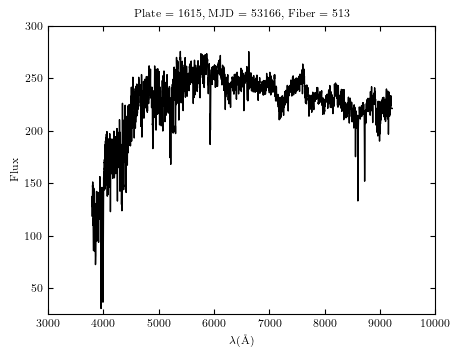

In [3]:
from astroML.datasets import fetch_sdss_spectrum

setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(spec.wavelength(), spec.spectrum, '-k', lw=1)

ax.set_xlim(3000, 10000)
ax.set_ylim(25, 300)

ax.set_xlabel(r'$\lambda {(\rm \AA)}$')
ax.set_ylabel('Flux')
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

plt.show()

## Figure 1.3 SDSS galaxies color-magnitude diagram

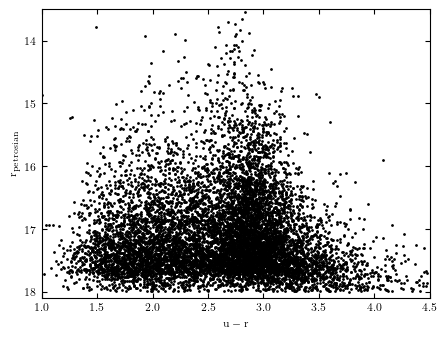

In [4]:
from astroML.datasets import fetch_sdss_specgals

#------------------------------------------------------------
# Fetch spectroscopic galaxy data
data = fetch_sdss_specgals()
data = data[:10000]

u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

#------------------------------------------------------------
# Plot the galaxy colors and magnitudes
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(u - r, rPetro, '.k', markersize=2)

ax.set_xlim(1, 4.5)
ax.set_ylim(18.1, 13.5)

ax.set_xlabel(r'$\mathrm{u - r}$')
ax.set_ylabel(r'$\mathrm{r_{petrosian}}$')

plt.show()

## Figure 1.4 SDSS DR7 quasar catalog color-z diagram

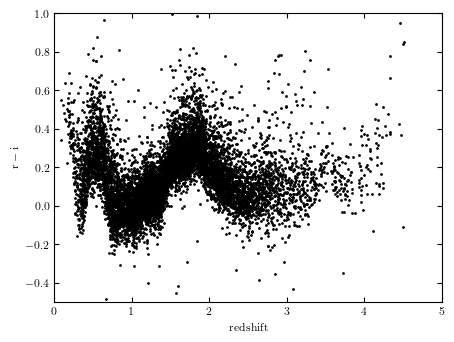

In [5]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_dr7_quasar



#------------------------------------------------------------
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

r = data['mag_r']
i = data['mag_i']
z = data['redshift']

#------------------------------------------------------------
# Plot the quasar data
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(z, r - i, marker='.', markersize=2, linestyle='none', color='black')

ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)

ax.set_xlabel(r'${\rm redshift}$')
ax.set_ylabel(r'${\rm r-i}$')

plt.show()

## Figure 1.5 SDSS HR diagram

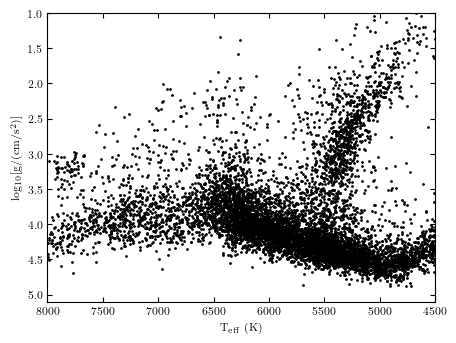

In [6]:
from astroML.datasets import fetch_sdss_sspp

#------------------------------------------------------------
# Fetch the data
data = fetch_sdss_sspp()

# select the first 10000 points
data = data[:10000]

# do some reasonable magnitude cuts
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]

# get the desired data
logg = data['logg']
Teff = data['Teff']

#------------------------------------------------------------
# Plot the data
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(Teff, logg, marker='.', markersize=2, linestyle='none', color='black')

ax.set_xlim(8000, 4500)
ax.set_ylim(5.1, 1)

ax.set_xlabel(r'$\mathrm{T_{eff}\ (K)}$')
ax.set_ylabel(r'$\mathrm{log_{10}[g / (cm/s^2)]}$')

plt.show()

## Figure 1.6 SDSS Stripe 82

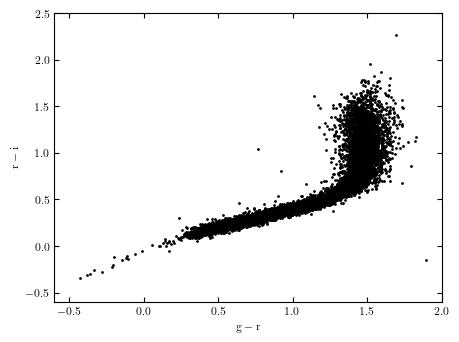

In [7]:
from astroML.datasets import fetch_sdss_S82standards

#------------------------------------------------------------
# Fetch the stripe 82 data
data = fetch_sdss_S82standards()

# select the first 10000 points
data = data[:10000]

# select the mean magnitudes for g, r, i
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# Plot the g-r vs r-i colors
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(g - r, r - i, marker='.', markersize=2,
        color='black', linestyle='none')

ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-0.6, 2.5)

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

plt.show()

## Figure 1.7 LINEAR light curve

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_sample, fetch_LINEAR_geneva

#------------------------------------------------------------
# Get data for the plot
data = fetch_LINEAR_sample()
geneva = fetch_LINEAR_geneva()  # contains well-measured periods

# Compute the phased light curve for a single object.
# the best-fit period in the file is not accurate enough
# for light curve phasing.  The frequency below is
# calculated using Lomb Scargle (see chapter10/fig_LINEAR_LS.py)
id = 18525697
omega = 10.82722481
t, y, dy = data[id].T
phase = (t * omega * 0.5 / np.pi + 0.1) % 1

# Select colors, magnitudes, and periods from the global set
targets = data.targets[data.targets['LP1'] < 2]
r = targets['r']
gr = targets['gr']
ri = targets['ri']
logP = targets['LP1']

# Cross-match by ID with the geneva catalog to get more accurate periods
targetIDs = [str(ID).lstrip('0') for ID in targets['objectID']]
genevaIDs = [str(ID).lstrip('0') for ID in geneva['LINEARobjectID']]

def safe_index(L, val):
    try:
        return L.index(val)
    except ValueError:
        return -1

ind = np.array([safe_index(genevaIDs, ID) for ID in targetIDs])
mask = (ind >= 0)

logP = geneva['logP'][ind[mask]]
r = r[mask]
gr = gr[mask]
ri = ri[mask]

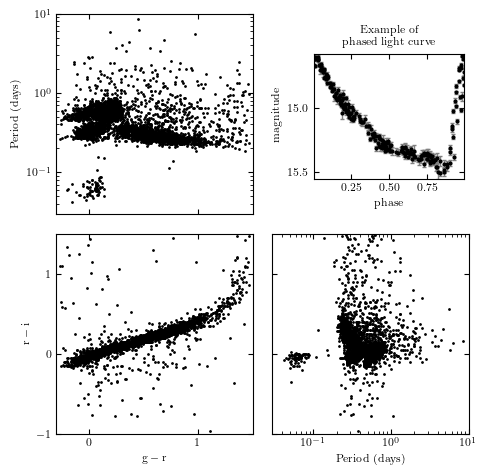

In [17]:
#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1,
                    top=0.95, right=0.95)

ax = fig.add_axes((0.64, 0.62, 0.3, 0.25))
plt.errorbar(phase, y, dy, fmt='.', color='black', ecolor='gray',
             lw=1, ms=4, capsize=1.5)
plt.ylim(plt.ylim()[::-1])
plt.xlabel('phase')
plt.ylabel('magnitude')
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.title("Example of\nphased light curve")

ax = fig.add_subplot(223)
ax.plot(gr, ri, '.', color='black', markersize=2)
ax.set_xlim(-0.3, 1.5)
ax.set_ylim(-1.0, 1.5)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.set_xlabel(r'${\rm g-r}$')
ax.set_ylabel(r'${\rm r-i}$')

ax = fig.add_subplot(221, yscale='log')
ax.plot(gr, 10 ** logP, '.', color='black', markersize=2)
ax.set_xlim(-0.3, 1.5)
ax.set_ylim(3E-2, 1E1)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('Period (days)')

ax = fig.add_subplot(224, xscale='log')
ax.plot(10 ** logP, ri, '.', color='black', markersize=2)
ax.set_xlim(3E-2, 1E1)
ax.set_ylim(-1.0, 1.5)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.set_xlabel('Period (days)')

plt.show()

## Figure 1.8 SDSS Moving Object Catalog

downloading moving object catalog from https://github.com/astroML/astroML-data/raw/main/datasets/ADR3.dat.gz to /Users/rui/astroML_data
[=========================================]  25.33Mb / 25.33Mb   
uncompressing file...


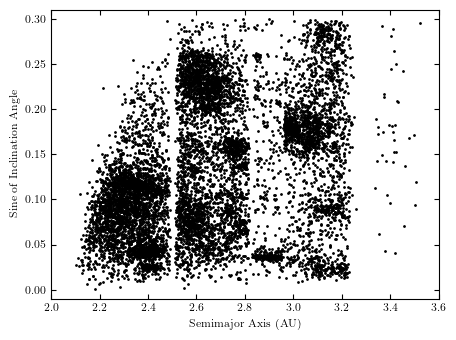

In [18]:
from astroML.datasets import fetch_moving_objects

#------------------------------------------------------------
# Fetch the moving object data
data = fetch_moving_objects(Parker2008_cuts=True)

# Use only the first 10000 points
data = data[:10000]

a = data['aprime']
sini = data['sin_iprime']

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(a, sini, '.', markersize=2, color='black')

ax.set_xlim(2.0, 3.6)
ax.set_ylim(-0.01, 0.31)

ax.set_xlabel('Semimajor Axis (AU)')
ax.set_ylabel('Sine of Inclination Angle')

plt.show()

---
# 数据可视化方法

## Contour plot (等高线图)
* 推荐使用混合等高线图
* 传统的等高线图会忽略只有几个点的区域的信息
* 混合等高线图在数据高密度区域使用等高线, 而低密度区域依然使用散点图

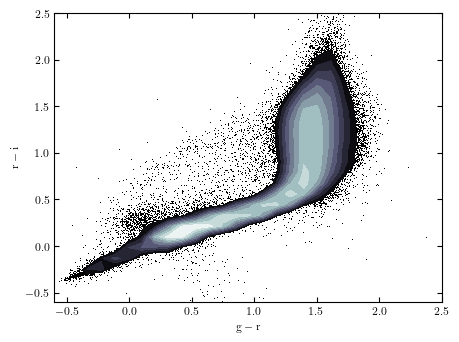

In [19]:
from astroML.plotting import scatter_contour
from astroML.datasets import fetch_sdss_S82standards

#------------------------------------------------------------
# Fetch the Stripe 82 standard star catalog

data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(g - r, r - i, threshold=200, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)

plt.show()

## Hess diagram (二维直方图)

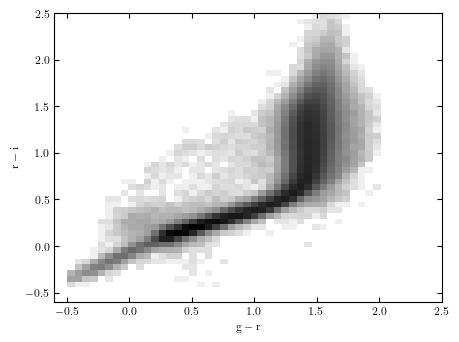

In [20]:
from astroML.datasets import fetch_sdss_S82standards

data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# Compute and plot the 2D histogram
H, xbins, ybins = np.histogram2d(g - r, r - i,
                                 bins=(np.linspace(-0.5, 2.5, 50),
                                       np.linspace(-0.5, 2.5, 50)))

# Create a black and white color map where bad data (NaNs) are white
cmap = plt.cm.binary
cmap.set_bad('w', 1.)

# Use the image display function imshow() to plot the result
fig, ax = plt.subplots(figsize=(5, 3.75))
H[H == 0] = 1  # prevent warnings in log10
ax.imshow(np.log10(H).T, origin='lower',
          extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
          cmap=cmap, interpolation='nearest',
          aspect='auto')

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)

plt.show()

## 混合二维直方图和轮廓图

/Users/rui/miniconda3/envs/AstroML/lib/python3.10/site-packages/astroML/stats/_binned_statistic.py:321: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_48785/3137922180.py:38: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(N.T), origin='lower',
/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_48785/3137922180.py:68: RuntimeWarning: divide by zero encountered in log10
  plt.contour(np.log10(N.T), levels, colors='k',
/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_48785/3137922180.py:88: RuntimeWarning: divide by zero encountered in log10
  plt.contour(np.log10(N.T), levels, colors='k',


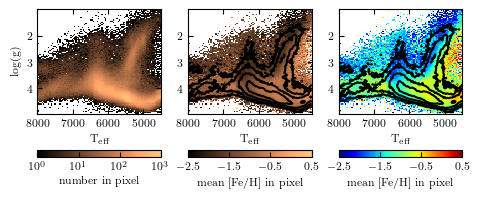

In [21]:
#------------------------------------------------------------
# Get SDSS SSPP data
from astroML.datasets import fetch_sdss_sspp
data = fetch_sdss_sspp()

# do some reasonable magnitude cuts
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]

# get the desired data
logg = data['logg']
Teff = data['Teff']
FeH = data['FeH']

#------------------------------------------------------------
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                               'mean', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

#--------------------
# First axes:
ax = plt.subplot(131, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.22,
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

#--------------------
# Second axes:
ax = plt.subplot(132, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#--------------------
# Third axes:
ax = plt.subplot(133, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.show()

## 4维数据可视化

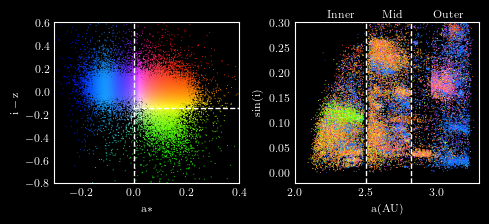

In [24]:
from astroML.datasets import fetch_moving_objects
from astroML.plotting.tools import devectorize_axes


def black_bg_subplot(*args, **kwargs):
    """Create a subplot with black background"""

    kwargs['facecolor'] = 'k'

    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax


def compute_color(mag_a, mag_i, mag_z, a_crit=-0.1):
    """
    Compute the scatter-plot color using code adapted from
    TCL source used in Parker 2008.
    """
    # define the base color scalings
    R = np.ones_like(mag_i)
    G = 0.5 * 10 ** (-2 * (mag_i - mag_z - 0.01))
    B = 1.5 * 10 ** (-8 * (mag_a + 0.0))

    # enhance green beyond the a_crit cutoff
    G += 10. / (1 + np.exp((mag_a - a_crit) / 0.02))

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T


#------------------------------------------------------------
# Fetch data and extract the desired quantities
data = fetch_moving_objects(Parker2008_cuts=True)
mag_a = data['mag_a']
mag_i = data['mag_i']
mag_z = data['mag_z']
a = data['aprime']
sini = data['sin_iprime']

# dither: magnitudes are recorded only to +/- 0.01
np.random.seed(0)
mag_a += -0.005 + 0.01 * np.random.random(size=mag_a.shape)
mag_i += -0.005 + 0.01 * np.random.random(size=mag_i.shape)
mag_z += -0.005 + 0.01 * np.random.random(size=mag_z.shape)

# compute RGB color based on magnitudes
color = compute_color(mag_a, mag_i, mag_z)

#------------------------------------------------------------
# set up the plot
fig = plt.figure(figsize=(5, 2.2), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.3,
                    bottom=0.2, top=0.93)

# plot the color-magnitude plot
ax = black_bg_subplot(121)
ax.scatter(mag_a, mag_i - mag_z,
           c=color, s=0.5, lw=0)
# devectorize_axes(ax, dpi=400)

ax.plot([0, 0], [-0.8, 0.6], '--w', lw=1)
ax.plot([0, 0.4], [-0.15, -0.15], '--w', lw=1)

ax.set_xlim(-0.3, 0.4)
ax.set_ylim(-0.8, 0.6)

ax.set_xlabel(r'${\rm a*}$', color='w')
ax.set_ylabel(r'${\rm i-z}$', color='w')

# plot the orbital parameters plot
ax = black_bg_subplot(122)
ax.scatter(a, sini,
           c=color, s=0.5, lw=0, edgecolor='none')
# devectorize_axes(ax, dpi=400)

ax.plot([2.5, 2.5], [-0.02, 0.3], '--w', lw=1)
ax.plot([2.82, 2.82], [-0.02, 0.3], '--w', lw=1)

ax.set_xlim(2.0, 3.3)
ax.set_ylim(-0.02, 0.3)

ax.set_xlabel(r'${\rm a (AU)}$', color='w')
ax.set_ylabel(r'${\rm sin(i)}$', color='w')

# label the plot
text_kwargs = dict(color='w', transform=plt.gca().transAxes,
                   ha='center', va='bottom')

ax.text(0.25, 1.02, 'Inner', **text_kwargs)
ax.text(0.53, 1.02, 'Mid', **text_kwargs)
ax.text(0.83, 1.02, 'Outer', **text_kwargs)

# Saving the black-background figure requires some extra arguments:
#fig.savefig('moving_objects.png',
#            facecolor='black',
#            edgecolor='none')

plt.show()

## 天图